## Exploracion fragmentos y end-motifs Ivan

### Fragmentos

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

pngfiles = glob.glob('/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/*.png')

print(pngfiles)

len(pngfiles)

['/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/L3950cf.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas4826cf-16colh.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas5068cf(1).bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas4948cf-1colh.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Seraseq2-5.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas5086cf.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas5050cf-3colh(1).bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas4814cf-20colh.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Cas4836cf-12colh.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/Seraseq1(1).bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/SeraseqWT(1).bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmentomics_ivan/SeraseqWT.bam.png', '/mnt/scratch_dir/suarezhs/tfm/files_fragmen

21

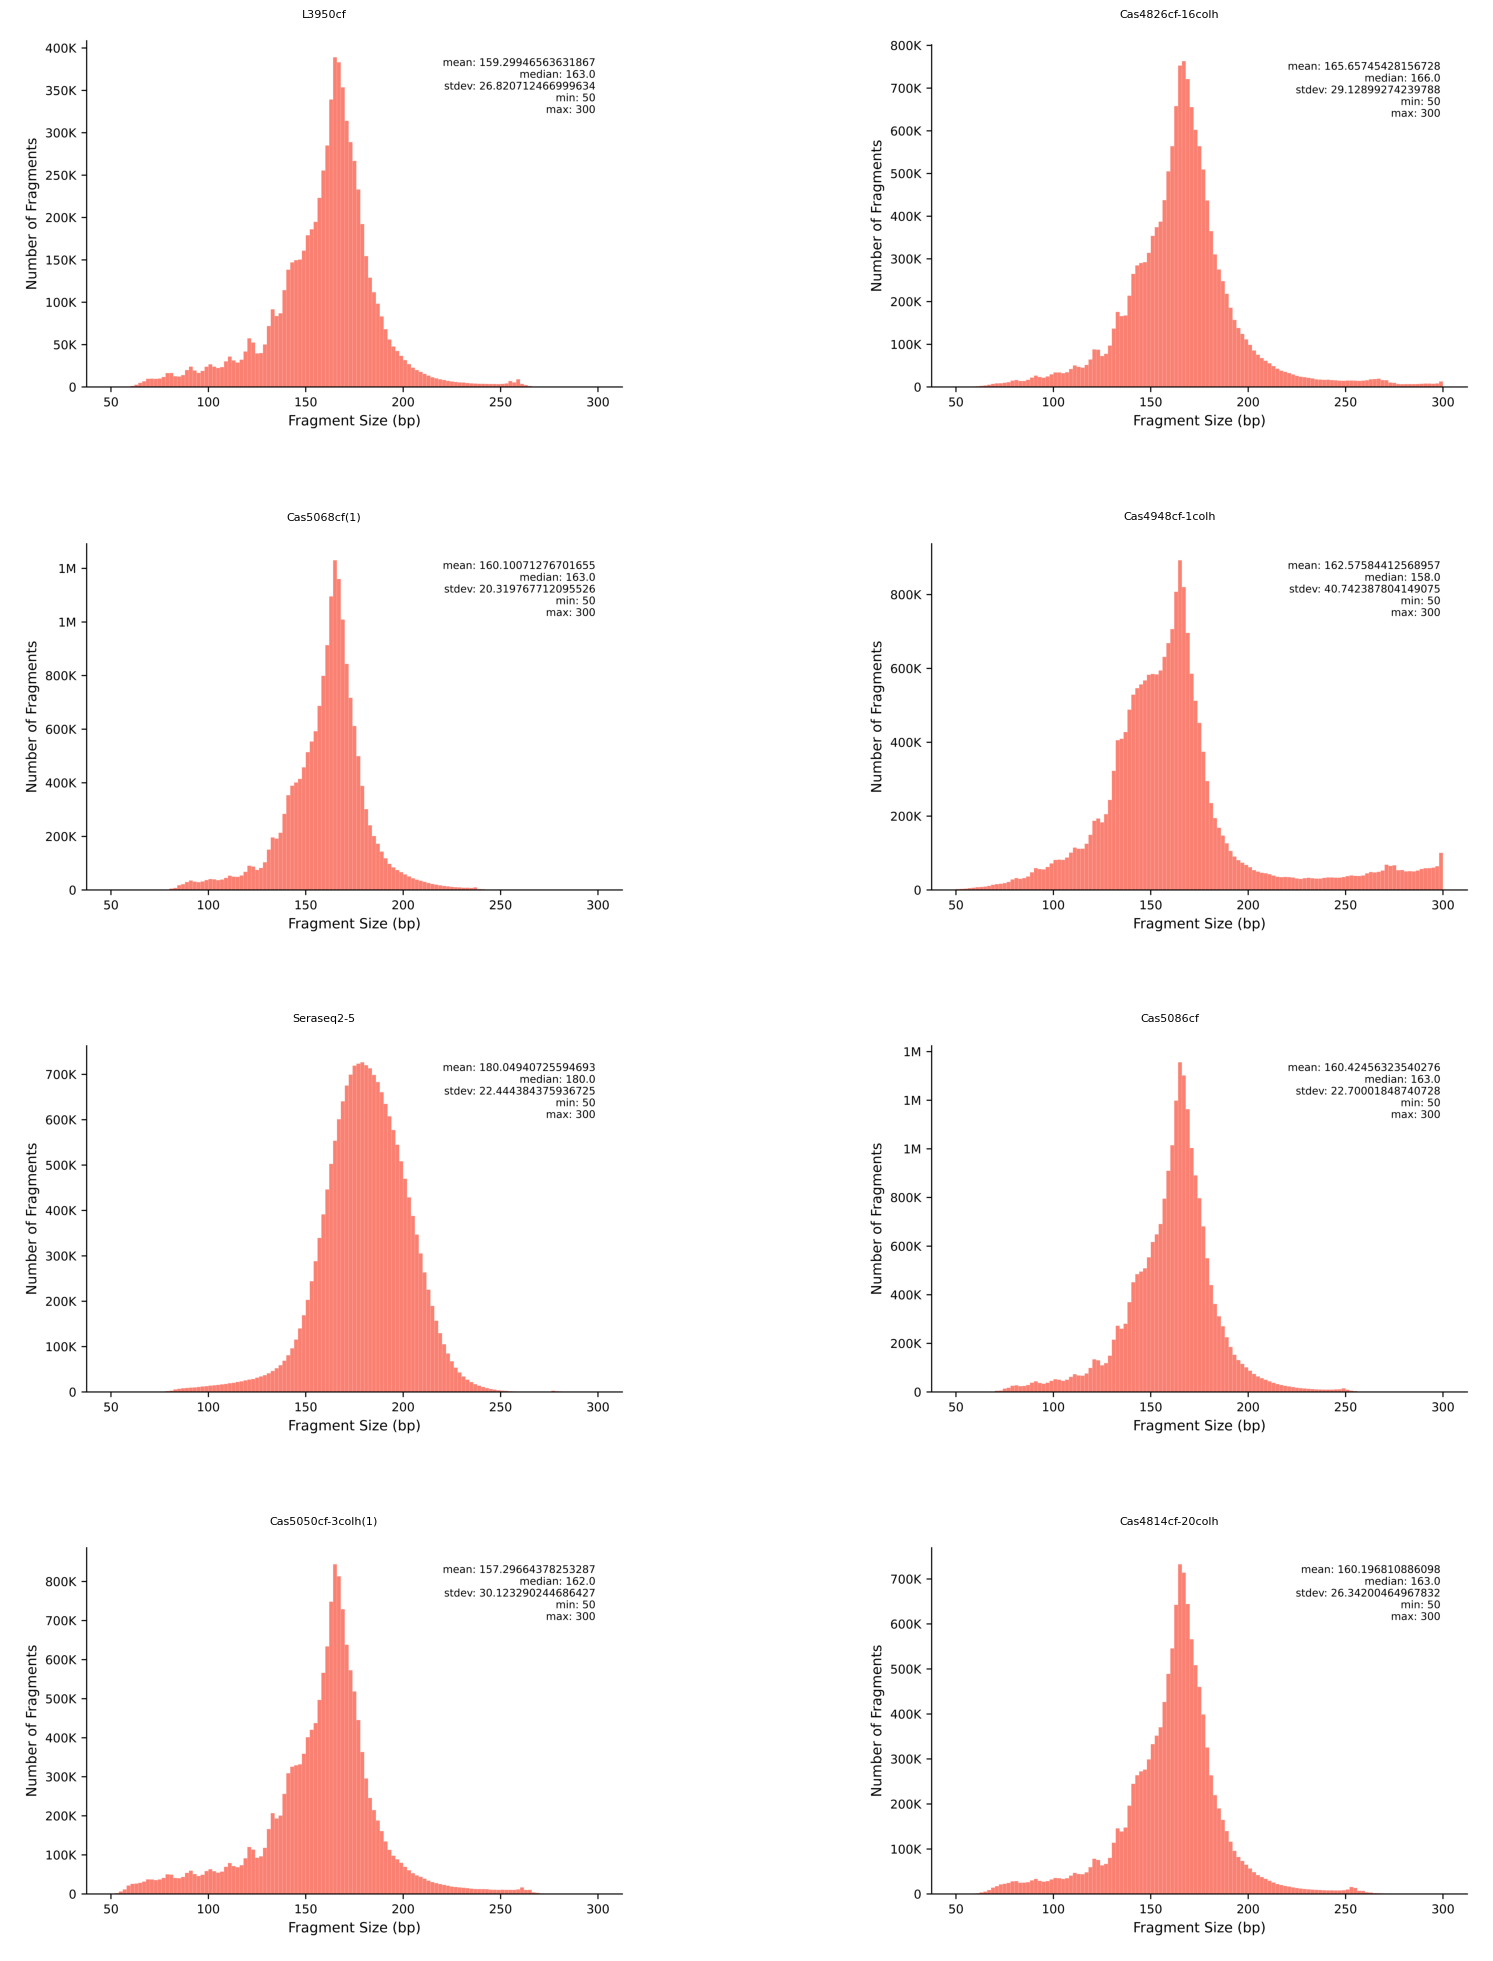

In [2]:
# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# Flatten axes array for easy iteration
axes = axes.flatten()

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .bam
    title = fname.split(".bam")[0]

    # Set the subplot title
    ax.set_title(title, fontsize=8)

### End-motifs

In [8]:
os.getcwd()

'/mnt/scratch_dir/suarezhs/tfm'

In [101]:
from os import path

li = []

for filename in os.listdir("files_fragmentomics_ivan"):
    if filename.endswith(".tsv") and 'histo' not in filename:
        #print(filename)
        df = pd.read_csv(os.path.join("files_fragmentomics_ivan", filename), 
                         index_col=None, 
                         header=None,
                         sep='\t'
        )
        li.append(df)
        # rename cols
        df.columns = ['endmotif', 'freq']
        # add filename as column
        df['filename'] = filename
        # add number of bases in endmotif (Ivan mentioned 2 and 4)
        df['bases_endmotif'] = df['endmotif'].str.len()
        #print(df.head())
    
dfemi = pd.concat(li, axis=0, ignore_index=True)
print(dfemi.head())

  endmotif      freq            filename  bases_endmotif
0       AA  0.056364  2Cas5068cf.bam.tsv               2
1       AC  0.044258  2Cas5068cf.bam.tsv               2
2       AG  0.060578  2Cas5068cf.bam.tsv               2
3       AT  0.033049  2Cas5068cf.bam.tsv               2
4       CA  0.100428  2Cas5068cf.bam.tsv               2


In [102]:
# since names are weird, I check if filenames are duplicated
# Suppose you already have your subset dataframe
subset = dfemi[dfemi['filename'].str.contains('Seraseq0-5')]

# Get the first two unique filenames
unique_files = subset['filename'].unique()

# Select rows corresponding to those two filenames
two_rows = subset.drop_duplicates(subset='filename').head(2)

# Print all columns
print(two_rows)

     endmotif      freq             filename  bases_endmotif
560      AAAA  0.013152   Seraseq0-5.bam.tsv               4
4064       AA  0.101819  2Seraseq0-5.bam.tsv               2


In [105]:
# add new column with common samplename for 2bp and 4bp rows
# (removing 2 from the filename)

dfemi['samplename'] = dfemi['filename'].str.removeprefix('2')
dfemi.head()

,endmotif,freq,filename,bases_endmotif,samplename
0,AA,0.056364,2Cas5068cf.bam.tsv,2,Cas5068cf.bam.tsv
1,AC,0.044258,2Cas5068cf.bam.tsv,2,Cas5068cf.bam.tsv
2,AG,0.060578,2Cas5068cf.bam.tsv,2,Cas5068cf.bam.tsv
3,AT,0.033049,2Cas5068cf.bam.tsv,2,Cas5068cf.bam.tsv
4,CA,0.100428,2Cas5068cf.bam.tsv,2,Cas5068cf.bam.tsv


In [118]:
# total number of samples - ok!
len(dfemi['samplename'].unique())

21

In [119]:
# plot end motifs


## Descarga datos

In [ ]:
python download_




## Muestras por pool

In [10]:
sample_dict = {}

# para cada pool run
for pool in os.listdir("runs"):
    
    # creamos path al samplesheet
    sheet = os.path.join("runs", pool, "SampleSheet.csv")
        
    # lista para guardar los Sample_ID de cada pool
    samples = []
    
    with open(sheet) as f:
        for line in f:
            # print("LINE:", repr(line))
            # al encontrar Sample_ID
            if "Sample_ID" in line:
                # para
                break
        
        for line in f:
            # separo la linea por espacios en blanco
            # y quito ""
            line = line.strip().replace('"', '')
            #print(line)
            # separo la linea en elementos de una lista
            # en las comas
            fields = line.split(",")
            #print(fields)
            # guardo la primera col 
            sample_name = fields[1]  # col2 = Sample_Name
            # y anyado a la lista
            samples.append(sample_name)

        print(f'{pool}: {samples}\n')

        # anyado el pool como key y el sample_name como value
        sample_dict[pool] = samples

#print(sample_dict)

POOL-551N: ['L-25000067', 'L-25000081', 'L-25000082', 'L-25000092', 'L-25000098', 'L-25000089', 'L-25000090', 'L-25000091']

POOL-496N: ['L-25000047', 'L-25000057', 'L-25000048', 'L-25000049', 'L-25000058', 'L-25000051', 'L-25000059', 'L-25000061']

POOL-401N: ['2-CH', '4-CH', '6-CH', '9-CH', '10-CH', '12-CH', 'CTRL-M-BL-CHUIMI', 'CTRL-F-BL-CHUIMI']

POOL-473N: ['L-25000011', 'L-25000023', 'L-25000024', 'L-25000015', 'L-25000010', 'L-25000020', 'L-25000021', 'L-25000022']

POOL-479N: ['ID1', 'ID2', 'ID3', 'ID4', 'ID5', 'ID6', 'ID7', 'ID8', 'ID9', 'ID10', 'ID11', 'ID12', 'ID13', 'ID14', 'ID15', 'ID16', 'ID17', 'ID18', 'ID19', 'ID20', 'ID21', 'ID22', 'ID23', 'ID24', 'ID25', 'ID26', 'ID27', 'ID28', 'ID29', 'ID30', 'ID31', 'ID32']

POOL-527N: ['L-25000063', 'L-25000065', 'L-25000069', 'L-25000071', 'L-25000076', 'L-25000075', 'L-25000066', 'L-25000080']

POOL-546N: ['L-25000007', 'L-25000105', 'L-25000038', 'L-25000046', 'L-25000026', 'L-25000064', 'L-25000086', 'L-25000099']



**NOTA:** POOL-479N no tiene SampleSheet.csv. La cree yo con todos los 32 indexes posibles y con nombres inventados para poder usar los datos. 

Tendre FASTQ solo para los indexes que aparezcan en los .bcl.

**Index = tag de la muestra**

### Samples sheets (ejemplo y creada)

In [18]:
# hechas 
pd.read_csv('runs/POOL-546N/SampleSheet.csv').tail(9)

,[Header],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
15,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Sample_Project,Description
16,L-25000007,L-25000007,NaN,NaN,A04,CCGTGAGA,NaN,NaN,CHUMI-546,NaN
17,L-25000105,L-25000105,NaN,NaN,B04,GACTAGTA,NaN,NaN,CHUMI-546,NaN
18,L-25000038,L-25000038,NaN,NaN,C04,GATAGACA,NaN,NaN,CHUMI-546,NaN
19,L-25000046,L-25000046,NaN,NaN,D04,GCTCGGTA,NaN,NaN,CHUMI-546,NaN
20,L-25000026,L-25000026,NaN,NaN,E04,GGTGCGAA,NaN,NaN,CHUMI-546,NaN
21,L-25000064,L-25000064,NaN,NaN,F04,AACAACCA,NaN,NaN,CHUMI-546,NaN
22,L-25000086,L-25000086,NaN,NaN,G04,CGGATTGC,NaN,NaN,CHUMI-546,NaN
23,L-25000099,L-25000099,NaN,NaN,H04,AGTCACTA,NaN,NaN,CHUMI-546,NaN


In [15]:
# creada
pd.read_csv('runs/POOL-479N/SampleSheet.csv').tail(33)

,[Header],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
15,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Sample_Project,Description
16,ID1,ID1,NaN,NaN,A01,GTCTGTCA,NaN,NaN,expn479,NaN
17,ID2,ID2,NaN,NaN,B01,TGAAGAGA,NaN,NaN,expn479,NaN
18,ID3,ID3,NaN,NaN,C01,TTCACGCA,NaN,NaN,expn479,NaN
19,ID4,ID4,NaN,NaN,D01,AACGTGAT,NaN,NaN,expn479,NaN
20,ID5,ID5,NaN,NaN,E01,ACCACTGT,NaN,NaN,expn479,NaN
21,ID6,ID6,NaN,NaN,F01,ACCTCCAA,NaN,NaN,expn479,NaN
22,ID7,ID7,NaN,NaN,G01,ATTGAGGA,NaN,NaN,expn479,NaN
23,ID8,ID8,NaN,NaN,H01,ACACAGAA,NaN,NaN,expn479,NaN
24,ID9,ID9,NaN,NaN,A02,GCGAGTAA,NaN,NaN,expn479,NaN


## Test cosas Snakemake

### Dry run

In [109]:
#!snakemake -s ./scripts/snakefile_bclfastq_align.py --dry-run -n

Error: Snakefile "scripts/snakefile_bclfastq_align.py" not found.


In [23]:
os.getcwd()

'/mnt/scratch_dir/suarezhs/tfm'

In [3]:
!snakemake -s scripts/snakefile_bamtofragbed.py --dry-run -n

Detected samples per pool:
{'POOL-401N': ['10-CH_S5', '6-CH_S3', '12-CH_S6', 'CTRL-M-BL-CHUIMI_S7', '4-CH_S2', '9-CH_S4', '2-CH_S1', 'CTRL-F-BL-CHUIMI_S8'], 'POOL-473N': ['L-25000010_S5', 'L-25000015_S4', 'L-25000021_S7', 'L-25000022_S8', 'L-25000024_S3', 'L-25000011_S1', 'L-25000023_S2', 'L-25000020_S6'], 'POOL-496N': ['L-25000061_S8', 'L-25000049_S4', 'L-25000059_S7', 'L-25000051_S6', 'L-25000047_S1', 'L-25000057_S2', 'L-25000058_S5', 'L-25000048_S3'], 'POOL-527N': ['L-25000066_S7', 'L-25000071_S4', 'L-25000080_S8', 'L-25000075_S6', 'L-25000065_S2', 'L-25000069_S3', 'L-25000063_S1', 'L-25000076_S5'], 'POOL-546N': ['L-25000007_S1', 'L-25000105_S2', 'L-25000099_S8', 'L-25000038_S3', 'L-25000026_S5', 'L-25000064_S6', 'L-25000046_S4', 'L-25000086_S7'], 'POOL-551N': ['L-25000092_S4', 'L-25000082_S3', 'L-25000089_S6', 'L-25000081_S2', 'L-25000090_S7', 'L-25000091_S8', 'L-25000067_S1', 'L-25000098_S5']}
host: rivm-comp-l01p.rivm.ssc-campus.nl
Building DAG of jobs...
InputFunctionException i

## bcl2fastq

* En HPC porque si no mato los recursos del nodo de OOD (no podia usar la Terminal)
* snake.sh contiene el comando snakefile para runnear snakefile_bcldastq_align.py 

In [ ]:
#!bsub -o out.txt -e err.txt -q bio -n 1 -W 1400 -M 64000 -hl -R 'rusage[mem=64000]' bash ./snake.sh

FASTQ files de la carpeta POOL-479

In [10]:
#!bsub -o out.txt -e err.txt -q bio -n 1 -W 1400 -M 15000 -hl -R 'rusage[mem=15000]' bash ./bcl2fastq.sh


CondaError: Run 'conda init' before 'conda activate'

Job <27053073> is submitted to queue <bio>.


In [24]:
!bjobs

JOBID    USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
27050774 suarezh RUN   ood        rivm-ood-l0 rivm-comp-l jupyterlab Nov 22 18:32


### Contenido output (fastq) 

In [44]:
# compruebo tamanyo contenido fastq
!du -sh ./fastq/POOL*/*

0	./fastq/POOL-401N/done.flag
380K	./fastq/POOL-401N/Reports
11G	./fastq/POOL-401N/RUN1-BL-CHUIMI
4.8M	./fastq/POOL-401N/Stats
149M	./fastq/POOL-401N/Undetermined_S0_R1_001.fastq.gz
151M	./fastq/POOL-401N/Undetermined_S0_R2_001.fastq.gz
0	./fastq/POOL-473N/done.flag
41G	./fastq/POOL-473N/Pool-473N-CHIMI
392K	./fastq/POOL-473N/Reports
20M	./fastq/POOL-473N/Stats
350M	./fastq/POOL-473N/Undetermined_S0_R1_001.fastq.gz
352M	./fastq/POOL-473N/Undetermined_S0_R2_001.fastq.gz
15G	./fastq/POOL-479N/expn479
4.0K	./fastq/POOL-479N/Stats
146M	./fastq/POOL-479N/Undetermined_S0_R1_001.fastq.gz
147M	./fastq/POOL-479N/Undetermined_S0_R2_001.fastq.gz
0	./fastq/POOL-496N/done.flag
41G	./fastq/POOL-496N/POOL-496
392K	./fastq/POOL-496N/Reports
19M	./fastq/POOL-496N/Stats
417M	./fastq/POOL-496N/Undetermined_S0_R1_001.fastq.gz
420M	./fastq/POOL-496N/Undetermined_S0_R2_001.fastq.gz
41G	./fastq/POOL-527N/CHUMI-527
0	./fastq/POOL-527N/done.flag
392K	./fastq/POOL-527N/Reports
20M	./fastq/POOL-527N/Stats
430M	.

In [5]:
%%bash
# fastq para cada pool estan en carpetas distintas
for d in fastq/POOL*; do
    # find busca en el primer nivel de d 
    pool_fastq_dir=$(find "$d" -maxdepth 1 -type d -mindepth 1 \
        ! -name "Stats" \
        ! -name "Reports")
    echo "POOL: $d"
    echo "Carpeta fastq files: $pool_fastq_dir"
    echo
done

POOL: fastq/POOL-401N
Carpeta fastq files: fastq/POOL-401N/RUN1-BL-CHUIMI

POOL: fastq/POOL-473N
Carpeta fastq files: fastq/POOL-473N/Pool-473N-CHIMI

POOL: fastq/POOL-479N
Carpeta fastq files: fastq/POOL-479N/expn479

POOL: fastq/POOL-496N
Carpeta fastq files: fastq/POOL-496N/POOL-496

POOL: fastq/POOL-527N
Carpeta fastq files: fastq/POOL-527N/CHUMI-527

POOL: fastq/POOL-546N
Carpeta fastq files: fastq/POOL-546N/CHUMI-546

POOL: fastq/POOL-551N
Carpeta fastq files: fastq/POOL-551N/CHUMI-551



**CONTENIDO FASTQ:**
* POOL-401: fastq son bastante pequenyos (M) en comparación al resto (G)
* POOL-479N: solo dos muestras tienen G de info. El resto entiendo que está vacío.
  * A04 (ID25)
  * F04 (ID30)

In [94]:
# para la carpeta con fastq files (ni stats ni reports)
# lista los archivos y su tamanyo
! for d in fastq/POOL*; do pool_fastq_dir=$(find "$d" -mindepth 1 -maxdepth 1 -type d \
! -name "Stats" \
! -name "Reports"); echo "$pool_fastq_dir"; ls "$pool_fastq_dir" -sh; done

fastq/POOL-401N/RUN1-BL-CHUIMI
total 11G
692M 10-CH_S5_R1_001.fastq.gz  760M 6-CH_S3_R1_001.fastq.gz
699M 10-CH_S5_R2_001.fastq.gz  769M 6-CH_S3_R2_001.fastq.gz
668M 12-CH_S6_R1_001.fastq.gz  688M 9-CH_S4_R1_001.fastq.gz
680M 12-CH_S6_R2_001.fastq.gz  698M 9-CH_S4_R2_001.fastq.gz
841M 2-CH_S1_R1_001.fastq.gz   402M CTRL-F-BL-CHUIMI_S8_R1_001.fastq.gz
852M 2-CH_S1_R2_001.fastq.gz   406M CTRL-F-BL-CHUIMI_S8_R2_001.fastq.gz
748M 4-CH_S2_R1_001.fastq.gz   431M CTRL-M-BL-CHUIMI_S7_R1_001.fastq.gz
762M 4-CH_S2_R2_001.fastq.gz   437M CTRL-M-BL-CHUIMI_S7_R2_001.fastq.gz
fastq/POOL-473N/Pool-473N-CHIMI
total 41G
2.5G L-25000010_S5_R1_001.fastq.gz  2.5G L-25000021_S7_R1_001.fastq.gz
2.6G L-25000010_S5_R2_001.fastq.gz  2.5G L-25000021_S7_R2_001.fastq.gz
2.5G L-25000011_S1_R1_001.fastq.gz  2.6G L-25000022_S8_R1_001.fastq.gz
2.5G L-25000011_S1_R2_001.fastq.gz  2.6G L-25000022_S8_R2_001.fastq.gz
2.5G L-25000015_S4_R1_001.fastq.gz  2.6G L-25000023_S2_R1_001.fastq.gz
2.6G L-25000015_S4_R2_001.fastq.gz

### Undetermined reads


**CONTENIDO UNDETERMINED:**
* Bases de los bcl que no se leen e inclueyen el fastq. Por el mask del demultiplexing, deberían estar las 10bp del UMI.
* Tamanyo de muestras muy peque. Es buena senyal de que los FASTQ se generaron bien (pocas bases se descartaron)

In [117]:
!for d in fastq/*; do echo "${d%/}:"; ls "$d"/Unde* -sh; done

fastq/POOL-401N:
149M fastq/POOL-401N/Undetermined_S0_R1_001.fastq.gz
151M fastq/POOL-401N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-473N:
350M fastq/POOL-473N/Undetermined_S0_R1_001.fastq.gz
352M fastq/POOL-473N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-479N:
146M fastq/POOL-479N/Undetermined_S0_R1_001.fastq.gz
147M fastq/POOL-479N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-496N:
417M fastq/POOL-496N/Undetermined_S0_R1_001.fastq.gz
420M fastq/POOL-496N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-527N:
430M fastq/POOL-527N/Undetermined_S0_R1_001.fastq.gz
410M fastq/POOL-527N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-546N:
634M fastq/POOL-546N/Undetermined_S0_R1_001.fastq.gz
658M fastq/POOL-546N/Undetermined_S0_R2_001.fastq.gz
fastq/POOL-551N:
438M fastq/POOL-551N/Undetermined_S0_R1_001.fastq.gz
441M fastq/POOL-551N/Undetermined_S0_R2_001.fastq.gz


## FastQC and MultiQC

In [36]:
#!bsub -o out_fastqc.txt -e err_fastqc.txt -q bio -n 1 -W 1400 -M 10000 -hl -R 'rusage[mem=10000]' bash ./fastqc.sh

Job <27056294> is submitted to queue <bio>.


In [43]:
#!bjobs

JOBID    USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
27056294 suarezh RUN   bio        rivm-comp-l rivm-lsfsv- *fastqc.sh Nov 23 15:45
27056212 suarezh RUN   ood-high   rivm-ood-l0 rivm-comp-l *rlab-high Nov 23 12:33


## Alinear + marcar duplicados + filtrar + fragmentos

Referencias

* Generate index from reference running this once

In [ ]:
#bwa-mem2 index ./data/reference/hg38.fa

#bsub -o out_bwa_index.txt -e err_bwa_index.txt -q bio -n 1 -W 1400 -M 100000 -hl -R 'rusage[mem=100000]' bash bwa-mem2 index ./data/reference/hg38.fa

* Only for POOL-401N

In [ ]:
#bsub -o out_bwa.txt -e err_bwa.txt -q bio -n 1 -W 1400 -M 80000 -hl -R 'rusage[mem=80000]' bash ./scripts/bam_fragbed_generator.sh 

* Following 2 commands killed due to taking forever

In [ ]:
#bsub -o out_bwa_snake.txt -e err_bwa_snake.txt -q bio -n 4 -W 1400 -M 100000 -hl -R 'rusage[mem=100000]' snakemake -s ./scripts/snakefile_bamtofragbed.py --cores $LSB_DJOB_NUMPROC 

In [1]:
# bsub -o out_bamtofrag.txt -e err_bamtofrag.txt -q bio -n 8 -W 2800 -M 80000 -hl -R 'rusage[mem=80000]' snakemake -s scripts/snakefile_bamtofragbed.py --config pool=POOL-473N -j 8

24h solo dio para la carpeta mas ligera (POOL-401N) y no fue suficiente para completar ni el alignment de POOL-473N. Por tanto, modifique el Snakefile para que se paralelice el procesado de las muestras pool por pool.

*  pool=POOL-473 en el comando hace que el Snakefile coja *pool* y paralelice.
*  8 CPUs distribuidas en:
    * 4 para alignment (mas costoso)
    * 2 para marcar duplicados
    * 1 para los fragmentos
*  Quite el generar el .bai. Se puede generar mas tarde si quieres visualizar en el Genome Browser. Mantengo el frag.gz.tbi porque hace falta para FinaleToolKit.


In [ ]:
#bsub -o out_bamtofrag.txt -e err_bamtofrag.txt -q bio -n 8 -W 2800 -M 80000 -hl -R 'rusage[mem=80000]' \
#snakemake -s scripts/snakefile_bamtofragbed.py --config pool=POOL-473N -j 8

In [ ]:
# comando HPC
#bsub -o out_bcl2bam.txt -e err_bcl2bam.txt -q bio -n 8 -W 2800 -M 80000 -hl -R 'rusage[mem=80000]' snakemake -s scripts/snakefile_bcl2bam.py --config pool=POOL-401N -j 8 --cores 8


## Test FinaleToolkit pipeline

In [7]:
import os
os.getcwd()

'/mnt/scratch_dir/suarezhs/tfm'